# Hypthesis Testing Exercise
Quetion1)    A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# IMPORTING FILES

In [2]:
data_cutlets = pd.read_csv("D:/DATA SCIENCE/Hypothesis Testing Ass/Q1-Cutlets.csv")
data_cutlets

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [3]:
data_cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


# Descriptive Stats

In [4]:
data_cutlets.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [5]:
data_cutlets.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [6]:
data_cutlets.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
dtype: bool

In [7]:
data_cutlets.shape

(35, 2)

In [8]:
data_cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


# Plotting Data

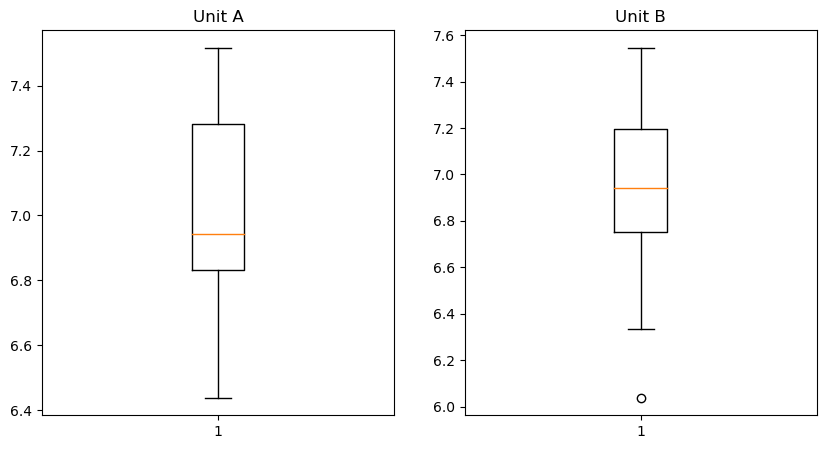

In [9]:
plt.subplots(figsize = (10,5))
plt.subplot(121)
plt.boxplot(data_cutlets['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.boxplot(data_cutlets['Unit B']) 
plt.title('Unit B')
plt.show()

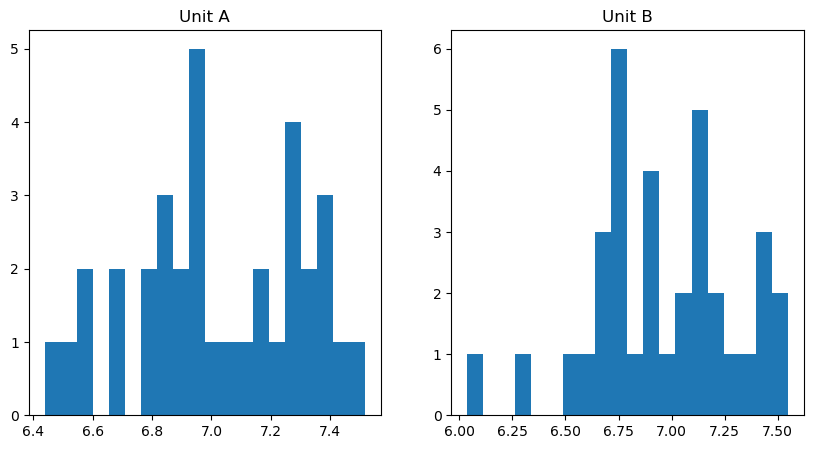

In [10]:
plt.subplots(figsize = (10,5))
plt.subplot(121)
plt.hist(data_cutlets['Unit A'],bins=20) 
plt.title('Unit A')
plt.subplot(122)
plt.hist(data_cutlets['Unit B'],bins=20)
plt.title('Unit B')
plt.show()

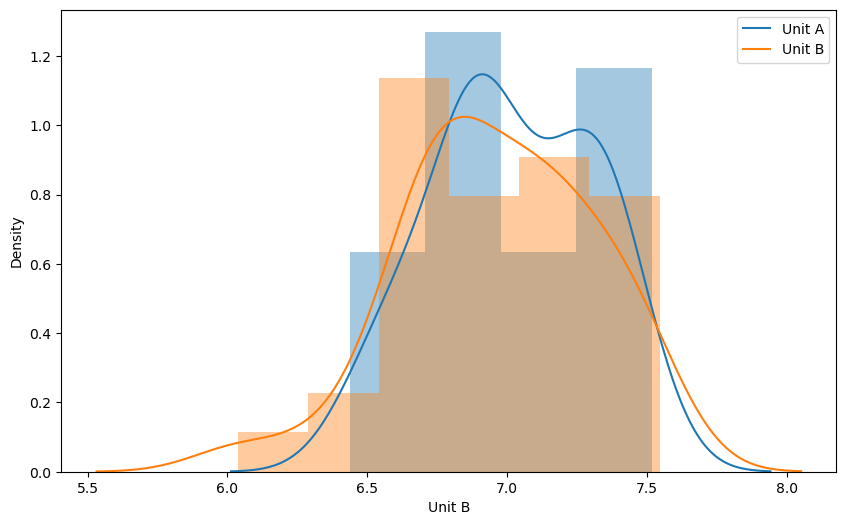

In [11]:
plt.figure(figsize=(10,6))
labels=['Unit A','Unit B']
sns.distplot(data_cutlets['Unit A'], kde = True)
sns.distplot(data_cutlets['Unit B'],hist= True)
plt.legend(labels)
plt.show()

# Plotting QQ Plot

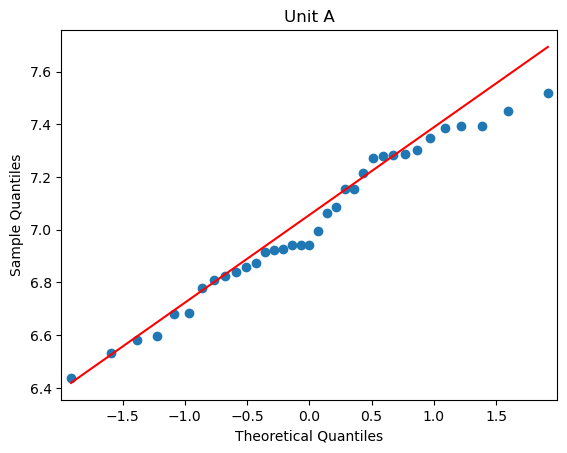

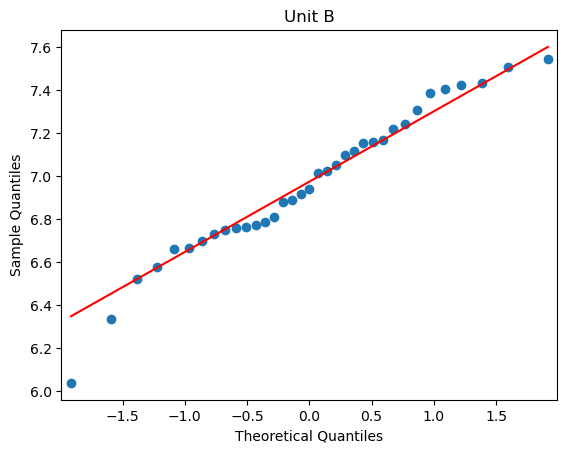

In [12]:
sm.qqplot(data_cutlets['Unit A'], line = 'q')
plt.title('Unit A')
sm.qqplot(data_cutlets['Unit B'], line = 'q')
plt.title('Unit B')
plt.show()

# Hypothesis Testing using t-stats

In [13]:
#2-sample 2 tail ttest: stats.ttest_ind(array1,array2)


In [14]:
p_value = stats.ttest_ind(data_cutlets['Unit A'],data_cutlets['Unit B'])
p_value

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

In [15]:
p_value[1] #2 tail Probability

0.4722394724599501

In [16]:
alpha = 0.025
print('Significance',(alpha,p_value))

Significance (0.025, Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501))


# Quetion No 2
QUETION 2)        A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
  Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

In [17]:
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

# Importing File

In [18]:
labtat=pd.read_csv("D:/DATA SCIENCE/Hypothesis Testing Ass/Q2-LabTaT.csv")

In [19]:
labtat

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60
...,...,...,...,...
115,178.49,170.66,193.80,172.68
116,176.08,183.98,215.25,177.64
117,202.48,174.54,203.99,170.27
118,182.40,197.18,194.52,150.87


In [20]:
labtat.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


# Applying Descriptive stats

In [21]:
labtat.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


# Check For Null Values

In [22]:
labtat.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

# Check For Duplicate Values

In [23]:
labtat.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
115    False
116    False
117    False
118    False
119    False
Length: 120, dtype: bool

In [24]:
labtat.shape

(120, 4)

In [25]:
labtat[labtat.duplicated()]

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4


# Check For Data Type

In [26]:
labtat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


# Plotting the Data

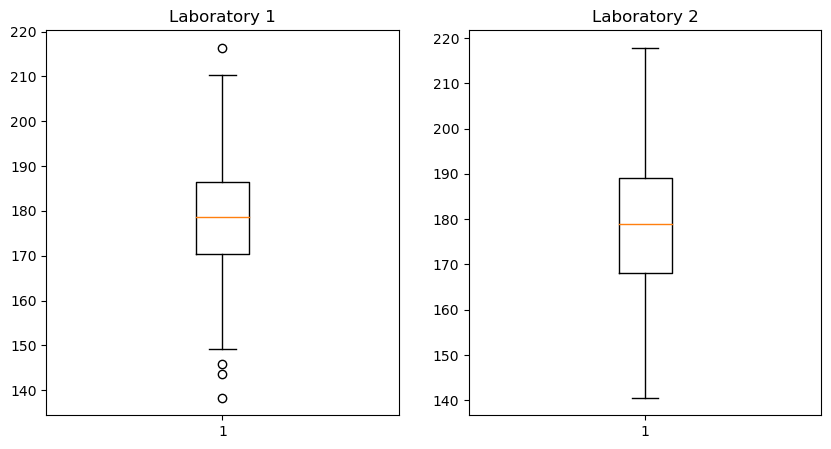

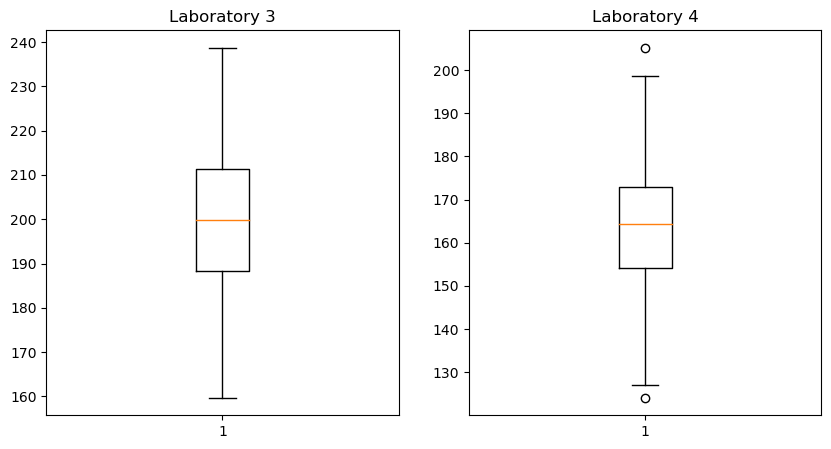

In [27]:
plt.subplots(figsize = (10,5))
plt.subplot(121)
plt.boxplot(labtat['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(122)
plt.boxplot(labtat['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplots(figsize = (10,5))
plt.subplot(121)
plt.boxplot(labtat['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(122)
plt.boxplot(labtat['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

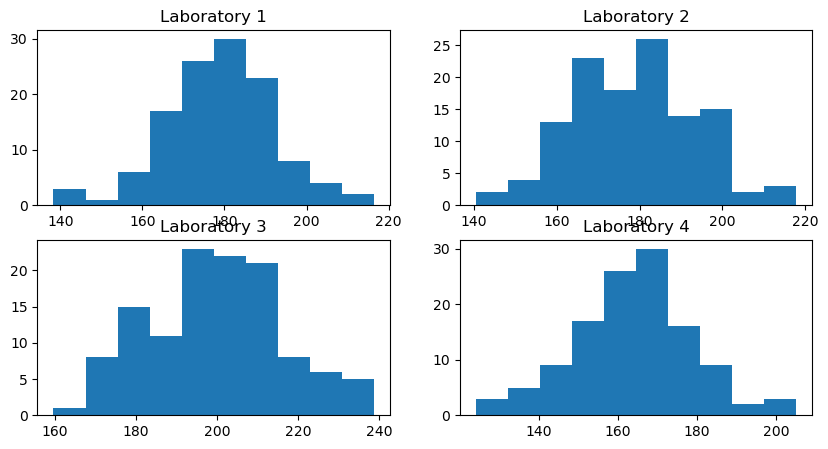

In [28]:
plt.subplots(figsize = (10,5))
plt.subplot(221)
plt.hist(labtat['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.hist(labtat['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.hist(labtat['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.hist(labtat['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

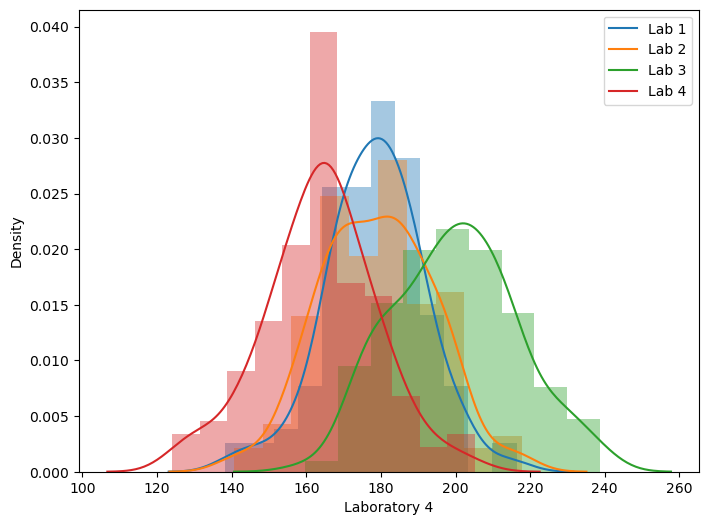

In [29]:
plt.figure(figsize = (8,6))
labels = ['Lab 1', 'Lab 2','Lab 3', 'Lab 4']
sns.distplot(labtat['Laboratory 1'], kde = True)
sns.distplot(labtat['Laboratory 2'],hist = True)
sns.distplot(labtat['Laboratory 3'],hist = True)
sns.distplot(labtat['Laboratory 4'],hist = True)
plt.legend(labels)
plt.show

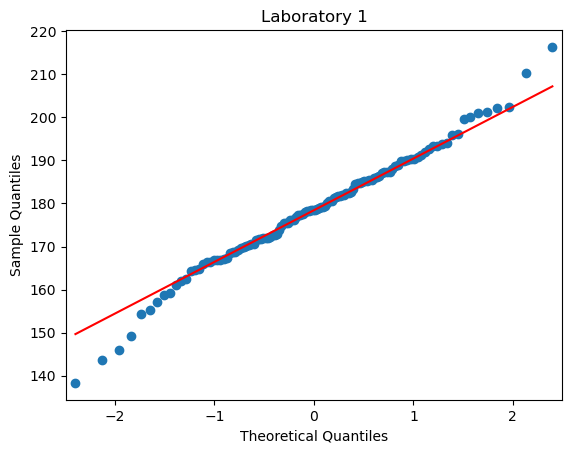

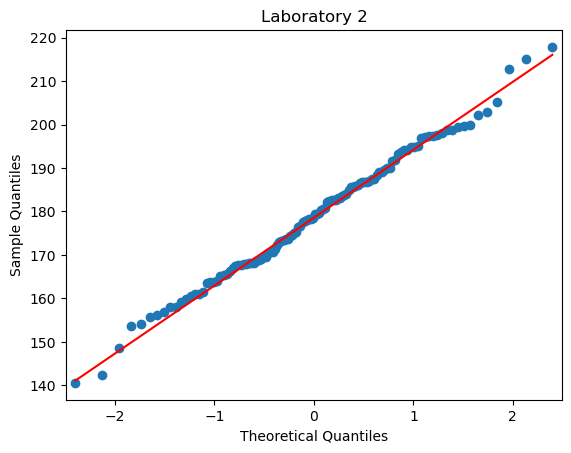

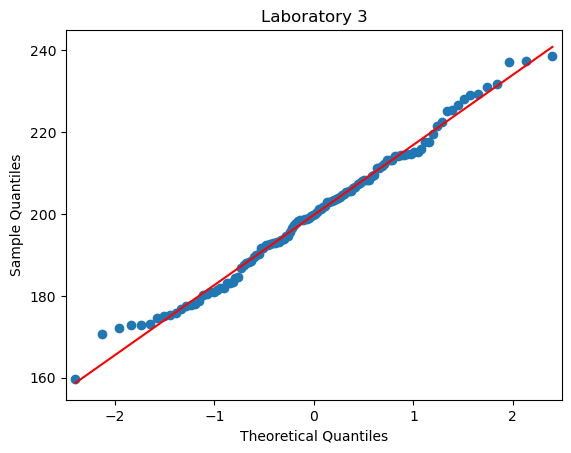

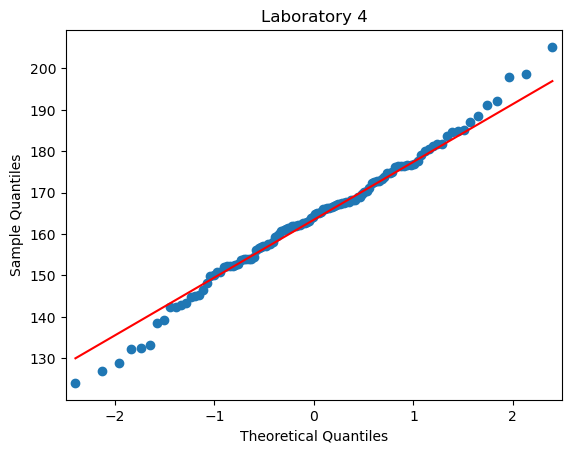

In [30]:
sm.qqplot(labtat['Laboratory 1'], line = 'q')
plt.title('Laboratory 1')
sm.qqplot(labtat['Laboratory 2'], line = 'q')
plt.title('Laboratory 2')
sm.qqplot(labtat['Laboratory 3'], line = 'q')
plt.title('Laboratory 3')
sm.qqplot(labtat['Laboratory 4'], line = 'q')
plt.title('Laboratory 4')
plt.show()

# Hypothesis using t-statictic

In [31]:
alpha=0.05
Lab1=pd.DataFrame(labtat['Laboratory 1'])
Lab2=pd.DataFrame(labtat['Laboratory 2'])
Lab3=pd.DataFrame(labtat['Laboratory 3'])
Lab4=pd.DataFrame(labtat['Laboratory 4'])

In [32]:
print(Lab1,Lab2,Lab3,Lab4)

     Laboratory 1
0          185.35
1          170.49
2          192.77
3          177.33
4          193.41
..            ...
115        178.49
116        176.08
117        202.48
118        182.40
119        182.09

[120 rows x 1 columns]      Laboratory 2
0          165.53
1          185.91
2          194.92
3          183.00
4          169.57
..            ...
115        170.66
116        183.98
117        174.54
118        197.18
119        215.17

[120 rows x 1 columns]      Laboratory 3
0          176.70
1          198.45
2          201.23
3          199.61
4          204.63
..            ...
115        193.80
116        215.25
117        203.99
118        194.52
119        221.49

[120 rows x 1 columns]      Laboratory 4
0          166.13
1          160.79
2          185.18
3          176.42
4          152.60
..            ...
115        172.68
116        177.64
117        170.27
118        150.87
119        162.21

[120 rows x 1 columns]


In [33]:
tStat, pvalue =stats.f_oneway(Lab1,Lab2,Lab3,Lab4)
print("P-Value:{0} T-Statistic:{1}".format(pvalue,tStat))

P-Value:[2.11567089e-57] T-Statistic:[118.70421654]


In [34]:
if pvalue < 0.05:
  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')

we reject null hypothesis


# QUETION 3 

# Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions


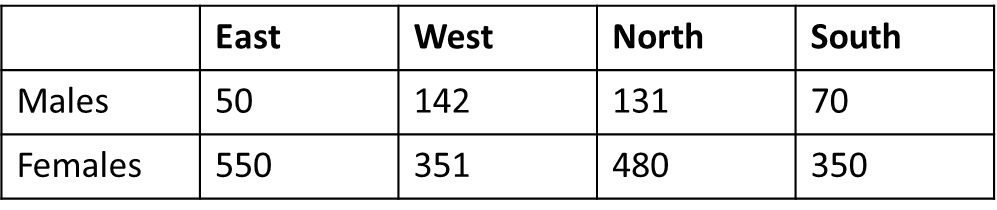
















In [35]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from PIL import ImageGrab
import statsmodels.api as sm

# Importing Data

In [36]:
BuyerRatio=pd.read_csv("D:/DATA SCIENCE/Hypothesis Testing Ass/Ass 3 Q3 Buyer Ratio.csv")

In [37]:
BuyerRatio

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [38]:
# make a dimentional array

In [39]:
table=np.array([[50,142,131,70],[435,1523,1356,750]])

# Applying Chi-Square X2  contingency table to convert observed value into expected value

In [40]:
# Chi2 contengency independence test 
# o/p is (Chi2 stats value, p_value, df, expected obsvations)
stats.chi2_contingency(table)

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [41]:
observed=np.array([50,142,131,70,435,1523,1356,750])
expected=np.array([42.76531299,146.81287862,131.11756787,72.30424052,442.23468701,1518.18712138,1355.88243213,747.69575948])

In [42]:
# the p value is 0.6603 is greter than the a therefore the null hypothesis is acceptttted.

In [43]:
data=np.array([[50,142,131,70],[435,1523,1356,750]])
data

array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]])

In [44]:
stat, p, dof, expected=chi2_contingency(data)
alpha=0.05
print("p value is" + str(p))
if p <=alpha:
    print('Dependent(reject H0)')
else:
    print('independent(H0 Hold true)')

p value is0.6603094907091882
independent(H0 Hold true)


In [45]:
print(stat)
print(p)

1.595945538661058
0.6603094907091882


# QUETION 4

# TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences


In [46]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2_contingency

# Importing Data

In [47]:

cof=pd.read_csv("D:/DATA SCIENCE/Hypothesis Testing Ass/Ass 3 Q4 Customer form.csv")
cof

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [48]:
cof.Phillippines.value_counts()

Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [49]:
cof.Indonesia.value_counts()

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [50]:
cof.Malta.value_counts()

Error Free    269
Defective      31
Name: Malta, dtype: int64

In [51]:
cof.India.value_counts()

Error Free    280
Defective      20
Name: India, dtype: int64

# Make a contingency table

In [52]:
table=np.array([[271,267,269,280],[29,33,31,20]])
table

array([[271, 267, 269, 280],
       [ 29,  33,  31,  20]])

In [53]:
# o/p is (Chi2 stats value, p_value, df, expected obsvations)

In [54]:
chi2_contingency(table) 

(3.858960685820355,
 0.2771020991233135,
 3,
 array([[271.75, 271.75, 271.75, 271.75],
        [ 28.25,  28.25,  28.25,  28.25]]))

In [55]:
observed=([271, 267, 269, 280,29,  33,  31,  20])
Expected=([271.75, 271.75, 271.75, 271.75,28.25,  28.25,  28.25,  28.25])

In [56]:
stat, p, dof, expected = chi2_contingency([[271,267,269,280],[29,33,31,20]])

In [57]:
stat

3.858960685820355

In [58]:
p

0.2771020991233135

In [59]:
alpha = 0.05
prob=1-alpha
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0),variables are related')
else:
	print('Independent (fail to reject H0), variables are not related')

probability=0.950, critical=7.815, stat=3.859
Independent (fail to reject H0), variables are not related


In [60]:
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

significance=0.050, p=0.277
Independent (fail to reject H0)
